In [ ]:
import warnings
warnings.filterwarnings('ignore')
import requests
import pandas as pd
pd.set_option('display.expand_frame_repr', False)
import datetime
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = [8, 5]
import dateutil
from datetime import datetime as dt
from pytz import utc

In [ ]:
# Data
url = "https://raw.githubusercontent.com/KhoaLearn/MoMo-Talents-2022/main/MOMO2022R2.xlsx"
data = requests.get(url).content
sheets = ['Case study', 'Data. Loyalty Points', 'Data. Loyalty benefits',
          'Data. Transactions', 'Data.Merchant']
list_df = list()
for sheet in sheets:
  temp_df = pd.read_excel(data, sheet_name = sheet)
  list_df.append(temp_df)

In [ ]:
# Example of DataFrame in Sheet 4
list_df[3]

,DATE,Order_id,NEWVERTICAL_Merchant,MerchantID,User_id,GMV,Service Group
0,2021-01-01,8.733623e+09,Marketplace,37.0,61386143.0,100000.0,marketplace
1,2021-01-01,8.726858e+09,Supermarket,9.0,48453125.0,5000.0,supermarket
2,2021-01-01,8.737327e+09,Supermarket,9.0,49921027.0,106600.0,supermarket
3,2021-01-01,8.732579e+09,supermarket,9.0,46022523.0,270000.0,supermarket
4,2021-01-01,8.725567e+09,CVS,8.0,44014594.0,68000.0,cvs
...,...,...,...,...,...,...,...
52755,2022-03-31,2.253143e+10,Airtime,41.0,53272777.0,30000.0,data
52756,2022-03-31,2.251696e+10,Airtime,41.0,41605249.0,10000.0,data
52757,2022-03-31,2.251805e+10,Airtime,30.0,29029358.0,42000.0,data
52758,2022-03-31,2.251805e+10,Airtime,30.0,29029358.0,5000.0,data


# Part 1: Data processing


## Question 1
Combined with the 'Loyalty Points' table, add a column 'Loyalty Points' in 'Transactions' table with given rules. Then create another table named 'Loyalty Ranking' which must includes columns named Rank_name and Calculated_points to calculate the Rank of each user on daily basic. At the end of Mar 2022, how many user achived rank Gold? 



In [ ]:
# Get numberonly and add new columns
list_df[1]['PM'] = list_df[1]['Point Mechanism'].apply(lambda x: int(x.split()[0]))
list_df[1]['MPPT'] = list_df[1]['Maximum Point Per Trans'].apply(lambda x: int(x.split()[0]))
list_df[1]

,Service Group,Point Mechanism,Maximum Point Per Trans,PM,MPPT
0,supermarket,1 points/1000VND GMV,500 points,1,500
1,data,10 points/1000VND GMV,1000 points,10,1000
2,cvs,1 points/1000VND GMV,300 points,1,300
3,marketplace,1 points/1000VND GMV,500 points,1,500
4,Coffee chains and Milk tea,1 points/1000VND GMV,500 points,1,500
5,Offline Beverage,1 points/1000VND GMV,300 points,1,300


In [ ]:
# Calculate "Loyalty Points"
list_df[3]['Loyalty Points'] = list_df[3].apply(lambda x: min(list_df[1].loc[list_df[1]['Service Group'] == x['Service Group'], 'PM'].iloc[0] / 1000 * x['GMV'], 
                                                              list_df[1].loc[list_df[1]['Service Group'] == x['Service Group'], 'MPPT'].iloc[0]), axis = 1)
list_df[3]

,DATE,Order_id,NEWVERTICAL_Merchant,MerchantID,User_id,GMV,Service Group,Loyalty Points
0,2021-01-01,8.733623e+09,Marketplace,37.0,61386143.0,100000.0,marketplace,100.0
1,2021-01-01,8.726858e+09,Supermarket,9.0,48453125.0,5000.0,supermarket,5.0
2,2021-01-01,8.737327e+09,Supermarket,9.0,49921027.0,106600.0,supermarket,106.6
3,2021-01-01,8.732579e+09,supermarket,9.0,46022523.0,270000.0,supermarket,270.0
4,2021-01-01,8.725567e+09,CVS,8.0,44014594.0,68000.0,cvs,68.0
...,...,...,...,...,...,...,...,...
52755,2022-03-31,2.253143e+10,Airtime,41.0,53272777.0,30000.0,data,300.0
52756,2022-03-31,2.251696e+10,Airtime,41.0,41605249.0,10000.0,data,100.0
52757,2022-03-31,2.251805e+10,Airtime,30.0,29029358.0,42000.0,data,420.0
52758,2022-03-31,2.251805e+10,Airtime,30.0,29029358.0,5000.0,data,50.0


In [ ]:
# Create new Dataframe with 1 columns is 'User_id'
list_df[3]['User_id'] = list_df[3]['User_id'].astype(int)
list_df.append(pd.DataFrame(set(list_df[3]['User_id']), columns = ['User_id']))
list_df[5]

,User_id
0,43024388
1,36634633
2,59015178
3,20086797
4,49807373
...,...
6474,35848172
6475,46727151
6476,48562160
6477,47742965


In [ ]:
# Add new columns 'Calculated_points' to Sheet 6 
list_df[5]['Calculated_points'] = list_df[5]['User_id'].apply(lambda x: sum(list_df[3].loc[list_df[3]['User_id'] == x]['Loyalty Points']))
list_df[5]

,User_id,Calculated_points
0,43024388,100.000
1,36634633,102.900
2,59015178,340.000
3,20086797,1437.000
4,49807373,160.496
...,...,...
6474,35848172,1800.000
6475,46727151,1.500
6476,48562160,28.000
6477,47742965,30.000


In [ ]:
# Rank function
def rank_user(pts):
  if pts < 1000:
    return [1, 'STANDARD']
  if pts < 2000:
    return [2, 'SILVER']
  if pts < 5000:
    return [3, 'GOLD']
  return [4, 'DIAMOND']

# Add new columns 'Class ID' and 'Rank_name'
list_df[5]['Class ID'] = pd.DataFrame(list_df[5]['Calculated_points'].apply(lambda x: rank_user(x)[0]))
list_df[5]['Rank_name'] = pd.DataFrame(list_df[5]['Calculated_points'].apply(lambda x: rank_user(x)[1]))
list_df[5]

,User_id,Calculated_points,Class ID,Rank_name
0,43024388,100.000,1,STANDARD
1,36634633,102.900,1,STANDARD
2,59015178,340.000,1,STANDARD
3,20086797,1437.000,2,SILVER
4,49807373,160.496,1,STANDARD
...,...,...,...,...
6474,35848172,1800.000,2,SILVER
6475,46727151,1.500,1,STANDARD
6476,48562160,28.000,1,STANDARD
6477,47742965,30.000,1,STANDARD


In [ ]:
# Calculated user achived rank Gold at the end of Mar 2022
print('Gold User Count:',
      len(list_df[5].loc[list_df[5]['Class ID'] == 3]))

Gold User Count: 740


## Question 2
Combined with the 'Loyalty benefits' table and 'Loyalty Ranking' table, add columns '%cashback'  in 'Transactions' table and calculate the total cashback cost in February 2022.

In [ ]:
def cashback(x):
  z = list_df[5].loc[list_df[5]['User_id'] == x['User_id'], 'Class ID'].iloc[0]
  y = list_df[2][list_df[2]['Group'] == x['Service Group']][list_df[2]['Class ID'] == z]
  if len(y) == 0:
    return 0
  return y['%cashback'].iloc[0]

list_df[3]['%cashback'] = list_df[3].apply(lambda x: cashback(x), axis = 1)
list_df[3]

,DATE,Order_id,NEWVERTICAL_Merchant,MerchantID,User_id,GMV,Service Group,Loyalty Points,%cashback
0,2021-01-01,8.733623e+09,Marketplace,37.0,61386143,100000.0,marketplace,100.0,0.0
1,2021-01-01,8.726858e+09,Supermarket,9.0,48453125,5000.0,supermarket,5.0,2.0
2,2021-01-01,8.737327e+09,Supermarket,9.0,49921027,106600.0,supermarket,106.6,0.0
3,2021-01-01,8.732579e+09,supermarket,9.0,46022523,270000.0,supermarket,270.0,5.0
4,2021-01-01,8.725567e+09,CVS,8.0,44014594,68000.0,cvs,68.0,0.0
...,...,...,...,...,...,...,...,...,...
52755,2022-03-31,2.253143e+10,Airtime,41.0,53272777,30000.0,data,300.0,0.0
52756,2022-03-31,2.251696e+10,Airtime,41.0,41605249,10000.0,data,100.0,7.0
52757,2022-03-31,2.251805e+10,Airtime,30.0,29029358,42000.0,data,420.0,0.0
52758,2022-03-31,2.251805e+10,Airtime,30.0,29029358,5000.0,data,50.0,0.0


In [ ]:
temp_df = list_df[3][list_df[3]['DATE'].apply(lambda x: x.year)  == 2022][list_df[3]['DATE'].apply(lambda x: x.month) == 2]
temp_df

,DATE,Order_id,NEWVERTICAL_Merchant,MerchantID,User_id,GMV,Service Group,Loyalty Points,%cashback
36987,2022-02-01,2.051038e+10,Airtime,30.0,32983630,14000.0,data,140.0,12.0
36988,2022-02-01,2.051434e+10,Airtime,30.0,3560552,10000.0,data,100.0,12.0
36989,2022-02-01,2.050236e+10,Airtime,30.0,52261329,28000.0,data,280.0,5.0
36990,2022-02-01,2.051489e+10,Airtime,30.0,45221505,20000.0,data,200.0,0.0
36991,2022-02-01,2.049811e+10,Airtime,30.0,32983630,5000.0,data,50.0,12.0
...,...,...,...,...,...,...,...,...,...
42461,2022-02-28,2.147015e+10,Airtime,41.0,47836168,15000.0,data,150.0,12.0
42462,2022-02-28,2.148059e+10,Airtime,41.0,48347141,15000.0,data,150.0,0.0
42463,2022-02-28,2.149338e+10,Airtime,41.0,60420174,25000.0,data,250.0,7.0
42464,2022-02-28,2.148108e+10,Airtime,30.0,17938338,10000.0,data,100.0,0.0


In [ ]:
print('Total Cashback Cost in February 2022:',
      sum((temp_df['%cashback'] * temp_df['GMV'] / 100).apply(lambda x: min(x, 10000))))

Total Cashback Cost in February 2022: 13738692.710000006


## Question 3
Design a weekly retention charts of since the program was lauched to monitor

In [ ]:
temp_df = list_df[3][list_df[3]['DATE'].apply(lambda x: x.year)  == 2022]
temp_df

,DATE,Order_id,NEWVERTICAL_Merchant,MerchantID,User_id,GMV,Service Group,Loyalty Points,%cashback
30362,2022-01-01,1.950295e+10,Supermarket,25.0,45715492,41400.0,supermarket,41.4,5.0
30363,2022-01-01,1.949249e+10,CVS,28.0,41720789,205000.0,cvs,205.0,12.0
30364,2022-01-01,1.949137e+10,CVS,28.0,55200938,237000.0,cvs,237.0,12.0
30365,2022-01-01,1.948503e+10,CVS,28.0,17144057,17000.0,cvs,17.0,0.0
30366,2022-01-01,1.949735e+10,Marketplace,37.0,46410460,340000.0,marketplace,340.0,0.0
...,...,...,...,...,...,...,...,...,...
52755,2022-03-31,2.253143e+10,Airtime,41.0,53272777,30000.0,data,300.0,0.0
52756,2022-03-31,2.251696e+10,Airtime,41.0,41605249,10000.0,data,100.0,7.0
52757,2022-03-31,2.251805e+10,Airtime,30.0,29029358,42000.0,data,420.0,0.0
52758,2022-03-31,2.251805e+10,Airtime,30.0,29029358,5000.0,data,50.0,0.0


In [ ]:
week = datetime.timedelta(days = 7)
def comeback(x):
  user_df = temp_df[temp_df['DATE'] > x['DATE']][temp_df['DATE'] <= x['DATE'] + week]
  if len(user_df[user_df['User_id'] == x['User_id']]):
    return 1
  return 0

In [ ]:
temp_df['comeback'] = temp_df.apply(lambda x: comeback(x), axis = 1)
temp_df

,DATE,Order_id,NEWVERTICAL_Merchant,MerchantID,User_id,GMV,Service Group,Loyalty Points,%cashback,comeback
30362,2022-01-01,1.950295e+10,Supermarket,25.0,45715492,41400.0,supermarket,41.4,5.0,1
30363,2022-01-01,1.949249e+10,CVS,28.0,41720789,205000.0,cvs,205.0,12.0,0
30364,2022-01-01,1.949137e+10,CVS,28.0,55200938,237000.0,cvs,237.0,12.0,1
30365,2022-01-01,1.948503e+10,CVS,28.0,17144057,17000.0,cvs,17.0,0.0,0
30366,2022-01-01,1.949735e+10,Marketplace,37.0,46410460,340000.0,marketplace,340.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...
52755,2022-03-31,2.253143e+10,Airtime,41.0,53272777,30000.0,data,300.0,0.0,0
52756,2022-03-31,2.251696e+10,Airtime,41.0,41605249,10000.0,data,100.0,7.0,0
52757,2022-03-31,2.251805e+10,Airtime,30.0,29029358,42000.0,data,420.0,0.0,0
52758,2022-03-31,2.251805e+10,Airtime,30.0,29029358,5000.0,data,50.0,0.0,0


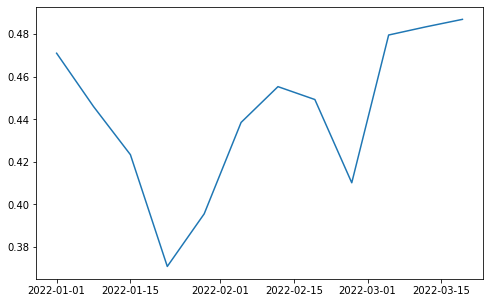

In [ ]:
start, end = temp_df['DATE'].iloc[0], temp_df['DATE'].iloc[-1]
times, retentions = [], []
while start + week < end:
  times.append(start)
  week_df = temp_df[temp_df['DATE'] >= start][temp_df['DATE'] < start + week]
  total = len(set(week_df['User_id']))
  retentions.append(len(set(week_df[week_df['comeback'] == 1]['User_id'])) / total)
  start = start + week
fig, ax = plt.subplots()
ax.plot(times, retentions)

# Part 2: Analyze and comment:

## Question 1
User retention and transaction behavior (Is there any trend?) since Loyalty program launched. Do you have any advice for the Marketing department in designing promotion campaigns to increase user retention's performance monthly?
https://docs.google.com/document/d/17BwDzyOH3-Dw840TY-F0uS05CAmwqIwHVdoZ4W6VQ-U/edit?usp=sharing

## Question 2
Momo is facing increasing amount of cashback cost as well as  GMV since launched. However, we want to optimize the cost but still want to keep growth of GMV and increase the retention rate.  Based on data given, please propose ideas to change the schemes of Loyalty benefits and Loyalty Points to alleviate the cost amount.
https://docs.google.com/document/d/17BwDzyOH3-Dw840TY-F0uS05CAmwqIwHVdoZ4W6VQ-U/edit?usp=sharing


# Part 3: Extend question

## Question 1: 
What ideas do you have for Momo in loyalty program development strategy?
https://docs.google.com/document/d/17BwDzyOH3-Dw840TY-F0uS05CAmwqIwHVdoZ4W6VQ-U/edit?usp=sharing


## Question 2: 
Gamification is usually a sensible option for apps to raise users’ stickiness. In our loyalty program development strategy, we also plan to hold a small game for users. The rule is simple: any users who can maintain a 20-day or longer streak of being in the DIAMOND ranking is a winner (in other words, winners are users who have total loyalty points greater than or equal to 5,000 for at least 20 consecutive days). We also want to give a special reward for the user(s) who can maintain the longest streak. Could you help us to calculate how many winners were there during the last thirty days in the given data (March 01 - March 31) and who was/were the one(s) boasting the longest streak during that time?
